In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [11]:
# Load data
df = pd.read_csv("/Users/mariahloehr/IICD/IICD/Data/top40_cell_cycle.csv")

# Separate features and target
X = df.drop(columns=['phase', 'age'])  # drop non-feature columns
y = df['age']

feature_names = X.columns.tolist()
X = X.to_numpy()
y = y.to_numpy()

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=949)

In [4]:
# Retrain with alpha = 0.01
lasso_best_alpha = Lasso(alpha =0.01, random_state=949, max_iter = 1000)
lasso_best_alpha.fit(X_train, y_train)

best_alpha_y_train_pred = lasso_best_alpha.predict(X_train)
best_alpha_y_test_pred = lasso_best_alpha.predict(X_test)

LOCO

In [4]:
import sys
sys.path.append("/Users/mariahloehr/IICD/IICD/feature_importance")

In [5]:
import locomp
from locomp import *
from locomp.MLmodels import *
import itertools
import importlib
from sklearn.base import BaseEstimator, RegressorMixin, clone
import itertools
from functools import partial
import multiprocessing as mp
import re

In [6]:
# define fit_func
def lasso(X,Y,X1):
    clf = Lasso(fit_intercept = False, alpha =0.01, random_state=949, max_iter = 10000).fit(X, Y)    
    return clf.predict(X1)

In [7]:
J1 = 0
J2 = 1
m_ratio = 0.2
n_ratio = 0.2
B = 5000
fit_func = lasso

In [13]:
x=LOCOMPReg(X_train,y_train,n_ratio,m_ratio,B,fit_func, selected_features=[],alpha=0.1,bonf=False)
x.run_loco()

In [14]:
x.loco_ci

array([[ 2.74522258e-01,  5.49044515e-01, -1.04556573e-03,
         2.24384144e-03,  5.99137856e-04],
       [ 3.06746898e-01,  6.13493797e-01, -4.37058678e-03,
         8.24429539e-03,  1.93685431e-03],
       [ 6.89607036e-01,  6.20785927e-01, -2.60191857e-03,
         1.39863701e-03, -6.01640779e-04],
       [ 4.97064374e-01,  9.94128748e-01, -1.37107737e-03,
         1.38340009e-03,  6.16135961e-06],
       [ 2.50053657e-01,  5.00107314e-01, -3.54576062e-03,
         8.47291141e-03,  2.46357540e-03],
       [ 6.68727326e-01,  6.62545349e-01, -4.60744144e-03,
         2.67524693e-03, -9.66097256e-04],
       [ 2.05159230e-01,  4.10318460e-01, -1.43162031e-03,
         4.30117993e-03,  1.43477981e-03],
       [ 4.06626124e-01,  8.13252249e-01, -5.44806403e-03,
         7.27539697e-03,  9.13666470e-04],
       [ 3.12753673e-01,  6.25507345e-01, -1.53870504e-03,
         2.83708766e-03,  6.49191312e-04],
       [ 5.37341221e-01,  9.25317559e-01, -2.03582209e-03,
         1.81629587e-03

In [15]:
ci_df = pd.DataFrame(x.loco_ci)
ci_df = ci_df.rename(columns={2: 'lower_bound', 3: 'upper_bound', 4: 'score'})
ci_df['feature_name'] = feature_names
fig_df = ci_df.nlargest(10, "score")

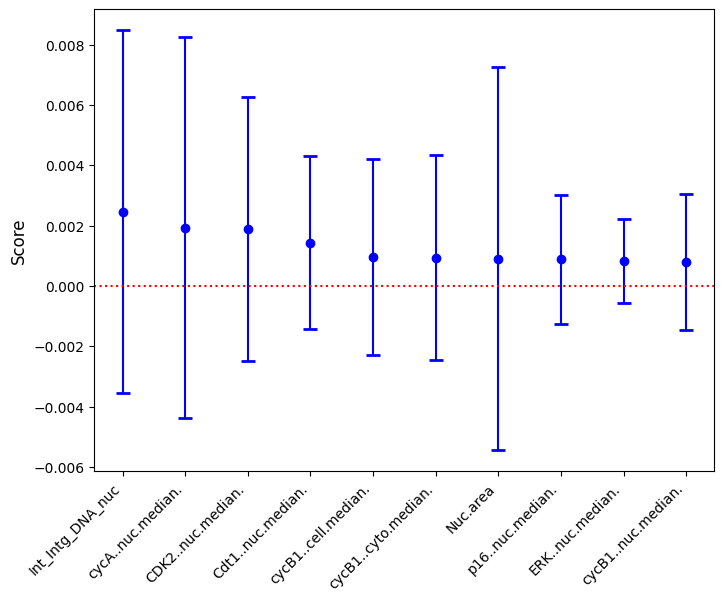

In [16]:
# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(
    fig_df["feature_name"], fig_df["score"],
    yerr=[fig_df["score"] - fig_df["lower_bound"], fig_df["upper_bound"] - fig_df["score"]],
    fmt="o", capsize=5, capthick=2, markersize=6, color="b"
)
plt.axhline(y=0, color='r', linestyle='dotted')
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha = 'right')
plt.show()